In [18]:
import numpy as np
import pandas as pd
import os
import urllib
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [19]:
df = pd.read_csv('cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [20]:
df.dropna()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [21]:
df.isnull()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [29]:
cereal_df = df.loc[:,'calories':'rating']
cereal_df = cereal_df.apply(lambda x: x.astype('float64'))

d = pairwise.pairwise_distances(cereal_df, metric='manhattan')
pd.DataFrame(d, columns=cereal_df.index, index=cereal_df.index)
# scikit-learn uses population standard deviation
cereal_df_norm = cereal_df.apply(preprocessing.scale, axis=0)
# pandas uses sample standard deviation
cereal_df_norm = (cereal_df - cereal_df.mean())/cereal_df.std()

d_norm = pairwise.pairwise_distances(cereal_df_norm,
metric='manhattan')
pd.DataFrame(d_norm, columns=cereal_df.index, index=cereal_df.index)


,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.000000,21.815602,3.862874,9.101697,20.206089,21.143149,22.006256,21.540971,15.953137,11.877899,...,22.612845,18.106657,25.101945,24.970139,19.639340,20.897613,22.878806,17.565509,18.567351,21.098226
1,21.815602,0.000000,22.626340,28.054080,12.565493,13.445436,14.027856,13.251724,17.716349,16.620387,...,20.206646,14.909538,18.834130,20.428137,16.350406,16.816272,15.019692,17.558087,15.980808,15.701432
2,3.862874,22.626340,0.000000,10.219009,19.346827,20.761029,22.816995,20.443137,15.093875,10.330110,...,20.587913,18.467440,23.792727,24.349448,18.330122,18.395538,23.450973,15.540577,17.258134,20.238964
3,9.101697,28.054080,10.219009,0.000000,26.205995,27.143055,26.257596,27.540877,21.953043,15.440712,...,25.275747,21.908041,29.751986,30.970046,24.289380,25.547654,28.878713,22.215550,23.217392,27.098133
4,20.206089,12.565493,19.346827,26.205995,0.000000,5.461644,7.729244,7.212317,9.525022,11.003855,...,13.187646,12.298375,9.427182,17.814907,11.713618,5.962175,7.288136,10.913037,11.344021,4.847336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,20.897613,16.816272,18.395538,25.547654,5.962175,9.712423,10.834555,8.977083,9.749142,11.006853,...,11.019061,12.072541,5.397189,19.611144,10.120469,0.000000,9.694575,8.136770,9.283468,5.919505
73,22.878806,15.019692,23.450973,28.878713,7.288136,7.079415,3.878884,13.771005,11.694239,15.108001,...,13.208323,10.887623,11.011042,17.374872,14.136628,9.694575,0.000000,13.082255,11.364698,7.016553
74,17.565509,17.558087,15.540577,22.215550,10.913037,9.158487,13.383084,10.607136,3.534200,7.674748,...,7.817663,9.553864,13.056816,19.513808,8.061615,8.136770,13.082255,0.000000,1.974510,6.065701
75,18.567351,15.980808,17.258134,23.217392,11.344021,9.589471,11.665527,11.276692,4.792995,8.915162,...,6.558868,7.579354,11.339260,17.936530,6.344058,9.283468,11.364698,1.974510,0.000000,6.496685


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [32.5, 32.5, 71.25, 71.25],
  [10.0, 10.0, 51.875, 51.875],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [115.0, 115.0, 133.75, 133.75],
  [105.0, 105.0, 124.375, 124.375],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [210.0, 210.0, 233.75, 233.75],
  [190.0, 190.0, 221.875, 221.875],
  [170.0, 170.0, 205.9375, 205.9375],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [345.0, 345.0, 355.0, 355.0],
  [365.0, 365.0, 375.0, 375.0],
  [350.0, 350.0, 370.0, 370.0],
  [322.5, 32

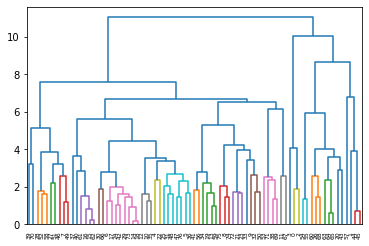

In [42]:
Z = linkage(cereal_df_norm, method='complete')
dendrogram(Z, labels=norm_df.index, color_threshold=2.75)

In [40]:
memb = fcluster(linkage(cereal_df_norm, method='complete', metric='cityblock'), 5, criterion='maxclust')
centroids = {}
for key, item in df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 50
Cluster 2: size 17
Cluster 3: size 3
Cluster 4: size 2
Cluster 5: size 5


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,106.00,2.24,0.78,180.20,1.24,15.28,7.16,64.68,31.00,1.98,1.00,0.88,39.50
2,128.24,3.12,2.06,157.35,3.29,14.24,9.71,159.12,32.35,2.94,1.20,0.70,37.31
3,63.33,4.00,0.67,176.67,11.00,6.67,3.67,310.00,25.00,3.00,1.00,0.39,73.84
4,50.00,1.50,0.00,0.00,0.50,11.50,0.00,32.50,0.00,3.00,0.50,1.00,61.88
5,92.00,3.20,0.40,16.00,2.74,15.00,-0.20,92.80,0.00,1.20,0.97,0.80,66.17


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [85.0, 85.0, 103.75, 103.75],
  [75.0, 75.0, 94.375, 94.375],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [355.0, 355.0, 365.0, 365.0],
  [405.0, 405.0, 415.0, 415.0],
  [395.0, 395.0, 410.0, 410.0],
  [425.0, 425.0, 435.0, 435.0],
  [525.0, 525.0, 535.0, 535.0],
  [515.0, 515.0, 530.0, 530.0],
  [505.0, 505.0, 522.5, 522.5],
  [495.0, 495.0, 513.75, 513.75],
  [485.0, 485.0, 504.375, 504.375],
  [475.0, 475.0, 494.6875, 494.6875],
  [465.0, 465.0, 484.84375, 484.84375],
  [555.0, 555.0, 565.0, 565.0],
  [545.0, 545.0, 560.0, 

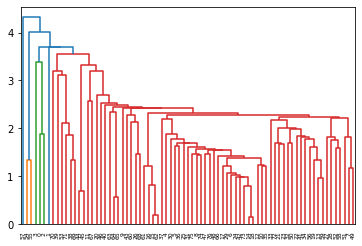

In [39]:
Z = linkage(cereal_df_norm, method='single')
dendrogram(Z, labels=norm_df.index, color_threshold=3.6)

In [41]:
memb = fcluster(linkage(cereal_df_norm, method='single', metric='cityblock'), 5, criterion='maxclust')
centroids = {}
for key, item in df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 3
Cluster 2: size 2
Cluster 3: size 70
Cluster 4: size 1
Cluster 5: size 1


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,63.33,4.00,0.67,176.67,11.00,6.67,3.67,310.00,25.0,3.00,1.00,0.39,73.84
2,50.00,1.50,0.00,0.00,0.50,11.50,0.00,32.50,0.0,3.00,0.50,1.00,61.88
3,110.29,2.47,0.99,167.86,1.81,15.34,7.36,87.97,30.0,2.16,1.05,0.83,40.79
4,120.00,3.00,5.00,15.00,2.00,8.00,8.00,135.00,0.0,3.00,1.00,1.00,33.98
5,100.00,5.00,2.00,0.00,2.70,-1.00,-1.00,110.00,0.0,1.00,1.00,0.67,50.83


The single linkage combined most of the records together leaving it to be five total clusters and the last cluster being the largest cluster. However, when it comes to the complete linkage, the records are evenly dispursed.

question 2
Complete linkage leads to the most meaningful clusters because it gives a better visualization of the data. Rather than guessing how everything relates to the last cluster with 70 records, in single linkage. We can look at multiple clusters of records on the data combined into five overarching clusters. It is easier to see what story could be thought through the clusters.


In [36]:
d1 = pairwise.pairwise_distances(cereal_df, metric='euclidean')
pd.DataFrame(d1, columns=cereal_df.index, index=cereal_df.index)
# scikit-learn uses population standard deviation
cerealdf_norm = cereal_df.apply(preprocessing.scale, axis=0)
# pandas uses sample standard deviation
cerealdf_norm = (cereal_df - cereal_df.mean())/cereal_df.std()

dnorm = pairwise.pairwise_distances(cerealdf_norm,
metric='euclidean')
pd.DataFrame(dnorm, columns=cereal_df.index, index=cereal_df.index)


,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.000000,7.532533,1.890271,3.384574,7.265122,7.031953,7.505175,7.234779,5.604027,4.076185,...,7.515962,6.216740,8.722896,8.271275,6.872608,7.666398e+00,8.096975,6.049269,6.482895,7.289155
1,7.532533,0.000000,7.774821,10.032924,4.800110,4.853266,5.903926,5.246343,6.137387,6.451191,...,7.355732,6.127813,7.421731,7.707481,6.901087,6.292562e+00,5.456274,6.298395,6.025058,5.894304
2,1.890271,7.774821,0.000000,4.039704,7.082456,6.866533,7.559504,6.890644,5.364409,3.696377,...,7.255351,6.625223,8.421356,7.965224,6.613807,7.168325e+00,8.026115,5.655173,6.226399,7.019814
3,3.384574,10.032924,4.039704,0.000000,9.632460,9.540348,9.764886,9.435890,7.470087,5.940936,...,9.015909,7.641205,10.333152,10.202603,8.414073,9.503985e+00,10.370379,7.804839,7.999935,9.425586
4,7.265122,4.800110,7.082456,9.632460,0.000000,2.802867,3.139456,3.131221,3.741141,4.276739,...,5.313497,4.298263,4.228801,6.465383,4.459067,2.511119e+00,2.515354,3.796526,3.923816,2.779485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,7.666398,6.292562,7.168325,9.503985,2.511119,4.103621,4.233778,3.272586,3.725155,3.958352,...,4.884863,4.301808,3.591855,6.658442,4.196028,4.214685e-08,3.693563,3.267374,3.481236,2.996153
73,8.096975,5.456274,8.026115,10.370379,2.515354,2.449501,1.613794,4.231413,3.872031,5.007847,...,5.713946,3.908545,4.721810,6.428574,5.121804,3.693563e+00,0.000000,4.338124,4.051611,2.454063
74,6.049269,6.298395,5.655173,7.804839,3.796526,3.197642,4.326955,4.059257,1.448373,3.166878,...,3.506318,3.622793,4.959955,6.777260,4.391757,3.267374e+00,4.338124,0.000000,1.469801,2.213757
75,6.482895,6.025058,6.226399,7.999935,3.923816,3.356453,4.012655,4.206646,2.008447,3.478759,...,3.202139,3.033705,4.746212,6.659010,4.149392,3.481236e+00,4.051611,1.469801,0.000000,2.443462


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [85.0, 85.0, 103.75, 103.75],
  [75.0, 75.0, 94.375, 94.375],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [355.0, 355.0, 365.0, 365.0],
  [405.0, 405.0, 415.0, 415.0],
  [395.0, 395.0, 410.0, 410.0],
  [425.0, 425.0, 435.0, 435.0],
  [525.0, 525.0, 535.0, 535.0],
  [515.0, 515.0, 530.0, 530.0],
  [505.0, 505.0, 522.5, 522.5],
  [495.0, 495.0, 513.75, 513.75],
  [485.0, 485.0, 504.375, 504.375],
  [475.0, 475.0, 494.6875, 494.6875],
  [465.0, 465.0, 484.84375, 484.84375],
  [555.0, 555.0, 565.0, 565.0],
  [545.0, 545.0, 560.0, 

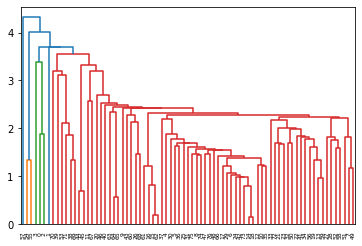

In [45]:
Z = linkage(cereal_df_norm, method='single', metric='euclidean')
dendrogram(Z, labels=norm_df.index, color_threshold=3.6)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [32.5, 32.5, 71.25, 71.25],
  [10.0, 10.0, 51.875, 51.875],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [115.0, 115.0, 133.75, 133.75],
  [105.0, 105.0, 124.375, 124.375],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [210.0, 210.0, 233.75, 233.75],
  [190.0, 190.0, 221.875, 221.875],
  [170.0, 170.0, 205.9375, 205.9375],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [345.0, 345.0, 355.0, 355.0],
  [365.0, 365.0, 375.0, 375.0],
  [350.0, 350.0, 370.0, 370.0],
  [322.5, 32

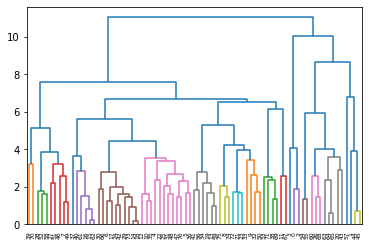

In [46]:
Z = linkage(cereal_df_norm, method='complete', metric='euclidean')
dendrogram(Z, labels=norm_df.index, color_threshold=3.6)

In [43]:
memb = fcluster(linkage(cereal_df_norm, method='single', metric='euclidean'), 5, criterion='maxclust')
centroids = {}
for key, item in df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 2
Cluster 2: size 3
Cluster 3: size 70
Cluster 4: size 1
Cluster 5: size 1


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,50.00,1.50,0.00,0.00,0.50,11.50,0.00,32.50,0.0,3.00,0.50,1.00,61.88
2,63.33,4.00,0.67,176.67,11.00,6.67,3.67,310.00,25.0,3.00,1.00,0.39,73.84
3,110.29,2.47,0.99,167.86,1.81,15.34,7.36,87.97,30.0,2.16,1.05,0.83,40.79
4,120.00,3.00,5.00,15.00,2.00,8.00,8.00,135.00,0.0,3.00,1.00,1.00,33.98
5,100.00,5.00,2.00,0.00,2.70,-1.00,-1.00,110.00,0.0,1.00,1.00,0.67,50.83


In [44]:
memb = fcluster(linkage(cereal_df_norm, method='complete', metric='euclidean'), 5, criterion='maxclust')
centroids = {}
for key, item in df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 10
Cluster 2: size 50
Cluster 3: size 3
Cluster 4: size 10
Cluster 5: size 4


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,132.00,3.00,1.40,192.00,3.65,15.55,10.90,172.50,40.0,2.90,1.34,0.71,36.26
2,107.20,2.26,0.96,189.80,1.31,15.01,7.26,66.88,31.0,2.04,1.00,0.85,38.27
3,63.33,4.00,0.67,176.67,11.00,6.67,3.67,310.00,25.0,3.00,1.00,0.39,73.84
4,84.00,2.50,0.10,9.50,2.00,15.90,2.10,81.40,10.0,2.00,0.88,0.86,63.17
5,130.00,4.00,3.25,65.00,2.68,9.75,7.25,146.25,12.5,2.50,1.00,0.92,39.02


Question 2 pt.2:

Depending on the linkage type. For single, no it is the same. However, for complete it is a bit different. cluster one has ten instead of 17 and Cluster four has ten instead of 3.

Question 3:
The linkage I would use to define the data is complete linkage because I can get an idea of the data and the variations in the data. Where as in the single linkage alot of that variation is lost. Looking at the matrices below, single linkage has the darker colors confined to very few of the clusters. However, the one cluster with 70 values hold the larger portion of records and within those records there is still a large portion of variation.


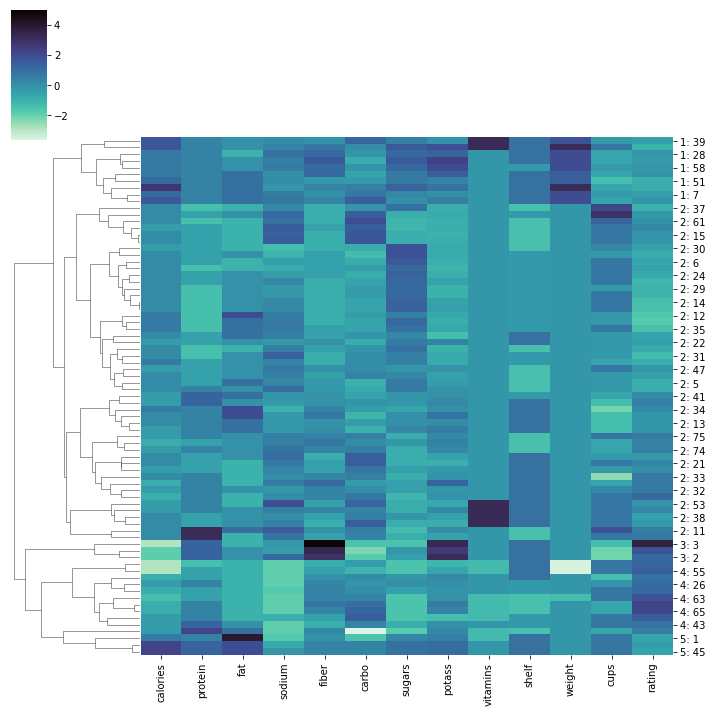

In [48]:
cereal_df_norm.index = ['{}: {}'.format(cluster, state)
                           for cluster, state in zip(memb, cereal_df_norm.index)]

sns.clustermap(cereal_df_norm, method='complete', col_cluster=False, cmap='mako_r')
print('Complete Linkage')

single linkage


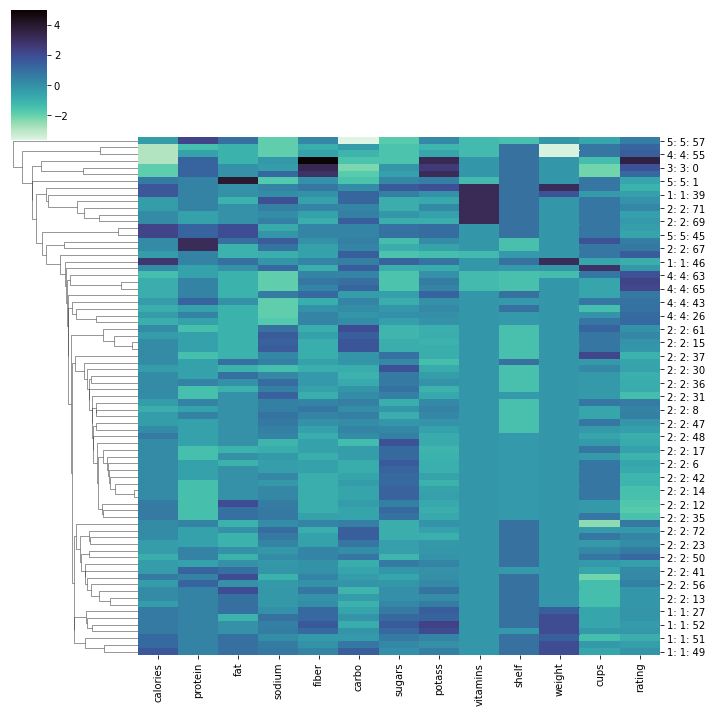

In [49]:

cereal_df_norm.index = ['{}: {}'.format(cluster, state)
                           for cluster, state in zip(memb, cereal_df_norm.index)]

sns.clustermap(cereal_df_norm, method='single', col_cluster=False, cmap='mako_r')
print('single linkage')

question 4:
No, the data should not be normalized. The goal of normalization is to change the values in the dataset to a common scale, without distorting differences in the ranges of values. The weight of the healthier options are more important in this case since that is what we are looking for. Rather take a Centroid linkage clustering approach to weigh each variable and see how healthy they really are.
"Centroid linkage clusteringis based on centroid distance, where clusters are represented by their mean values for each variable, which forms a vector of means” Excerpt From: Galit Shmueli. “Data Mining for Business Analytics.” 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [155.0, 155.0, 173.75, 173.75],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [305.0, 305.0, 323.75, 323.75],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [314.375, 314.375, 362.5, 362.5],
  [295.0, 295.0, 338.4375, 338.4375],
  [395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 400.0, 400.0],
  [415.0, 415.0, 425.0, 425.0],
  [392.5, 392.5, 420.0, 420.0],
  [316.71875, 316.71875, 406.25, 406.25],
  [285.0, 285.0, 361.484375, 361.484375],
  [260.0, 260.0, 323.2421875, 323.2421875],
  [2

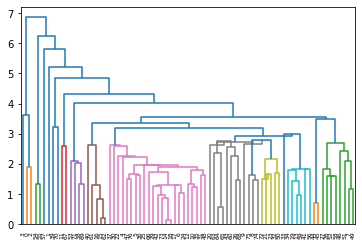

In [52]:
Z = linkage(cereal_df_norm, method='centroid')
dendrogram(Z, labels=norm_df.index, color_threshold=2.75)

In [56]:
memb = fcluster(linkage(cereal_df_norm, method='centroid', metric='euclidean'), 5, criterion='maxclust')
centroids = {}
for key, item in df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 3
Cluster 2: size 2
Cluster 3: size 70
Cluster 4: size 1
Cluster 5: size 1


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,63.33,4.00,0.67,176.67,11.00,6.67,3.67,310.00,25.0,3.00,1.00,0.39,73.84
2,50.00,1.50,0.00,0.00,0.50,11.50,0.00,32.50,0.0,3.00,0.50,1.00,61.88
3,110.29,2.47,0.99,167.86,1.81,15.34,7.36,87.97,30.0,2.16,1.05,0.83,40.79
4,120.00,3.00,5.00,15.00,2.00,8.00,8.00,135.00,0.0,3.00,1.00,1.00,33.98
5,100.00,5.00,2.00,0.00,2.70,-1.00,-1.00,110.00,0.0,1.00,1.00,0.67,50.83


single linkage


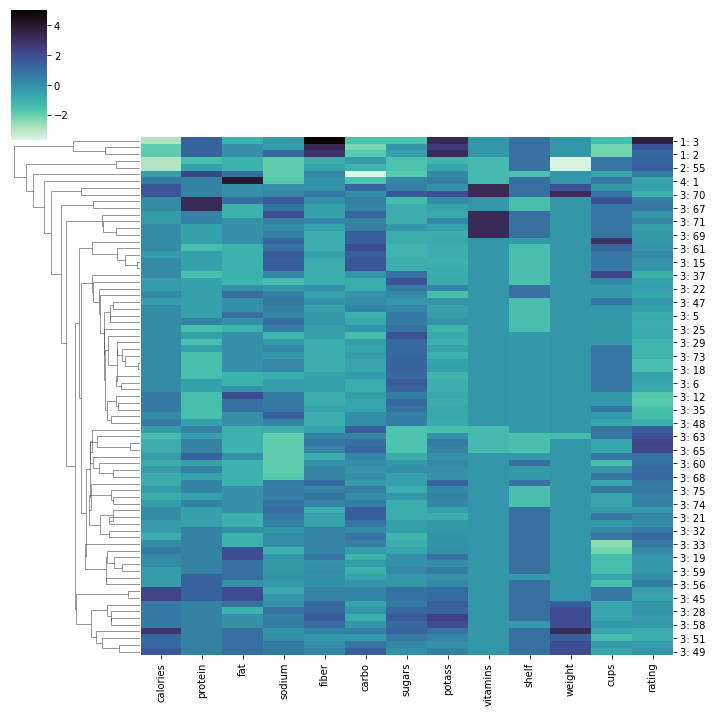

In [57]:

cereal_df_norm.index = ['{}: {}'.format(cluster, state)
                           for cluster, state in zip(memb, cereal_df_norm.index)]

sns.clustermap(cereal_df_norm, method='centroid', col_cluster=False, cmap='mako_r')
print('single linkage')